In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
# Importing the dataset
df = pd.read_csv('ipl_dataset.csv')

## Exploratory Data Analysis

In [3]:
df.head


<bound method NDFrame.head of        mid        date                                      venue  \
0        1  2008-04-18                      M Chinnaswamy Stadium   
1        1  2008-04-18                      M Chinnaswamy Stadium   
2        1  2008-04-18                      M Chinnaswamy Stadium   
3        1  2008-04-18                      M Chinnaswamy Stadium   
4        1  2008-04-18                      M Chinnaswamy Stadium   
...    ...         ...                                        ...   
76009  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76010  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76011  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76012  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   
76013  617  2017-05-21  Rajiv Gandhi International Stadium, Uppal   

                batting_team                 bowling_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC Gang

## Data Cleaning

### Removing Irrelevant Data Columns

In [4]:
# Dropping irrelevant columns
cols_to_drop = ['mid','batsman','bowler','striker','non-striker']
df.drop(cols_to_drop,axis=1,inplace=True)

In [5]:
df.head()

,date,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
# Storing the date in proper format for manipulation
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

### Dropping Non Consistent Teams, and keeping only consistent teams

In [7]:
# we have to remove temporary teams or the teams which are not available now
consistent_teams = ['Chennai Super Kings', 'Delhi Daredevils', 
                    'Kings XI Punjab', 'Kolkata Knight Riders', 
                    'Mumbai Indians', 'Rajasthan Royals', 
                    'Royal Challengers Bangalore', 'Sunrisers Hyderabad']
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]

In [8]:
df.head()

,date,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### Remove First 5 Overs of every match

In [9]:
# we don't want data of first five overs
df = df[df['overs']>=5.0]

In [10]:
# We don't want South African Venues as it was just for one year.
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Eden Gardens',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera',
       'Himachal Pradesh Cricket Association Stadium',
       'Subrata Roy Sahara Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Barabati Stadium', 'Maharashtra Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Punjab Cricket Association IS Bi

In [11]:
# Correcting Venue name and dropping South African Venue
def venue_name_correction(x):
    if x=='M Chinnaswamy Stadium':
        return 'M Chinnaswamy Stadium, Bangalore'
    elif x=='Feroz Shah Kotla':
        return 'Feroz Shah Kotla, Delhi'
    elif x=='Wankhede Stadium':
        return 'Wankhede Stadium, Mumbai'
    elif x=='Sawai Mansingh Stadium':
        return 'Sawai Mansingh Stadium, Jaipur'
    elif x=='Eden Gardens':
        return 'Eden Gardens, Kolkata'
    elif x=='Dr DY Patil Sports Academy':
        return 'Dr DY Patil Sports Academy, Mumbai'
    elif x=='Himachal Pradesh Cricket Association Stadium':
        return 'Himachal Pradesh Cricket Association Stadium, Dharamshala'
    elif x=='Subrata Roy Sahara Stadium':
        return 'Maharashtra Cricket Association Stadium, Pune'
    elif x=='Shaheed Veer Narayan Singh International Stadium':
        return 'Raipur International Cricket Stadium, Raipur'
    elif x=='JSCA International Stadium Complex':
        return 'JSCA International Stadium Complex, Ranchi'
    elif x=='Maharashtra Cricket Association Stadium':
        return 'Maharashtra Cricket Association Stadium, Pune'
    elif x=='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium':
        return 'ACA-VDCA Stadium, Visakhapatnam'
    elif x=='Punjab Cricket Association IS Bindra Stadium, Mohali':
        return 'Punjab Cricket Association Stadium, Mohali'
    elif x=='Holkar Cricket Stadium':
        return 'Holkar Cricket Stadium, Indore'
    elif x=='Sheikh Zayed Stadium':
        return 'Sheikh Zayed Stadium, Abu-Dhabi'
    elif x=='Sharjah Cricket Stadium':
        return 'Sharjah Cricket Stadium, Sharjah'
    elif x=='Dubai International Cricket Stadium':
        return 'Dubai International Cricket Stadium, Dubai'
    elif x=='Barabati Stadium':
        return 'Barabati Stadium, Cuttack'
    else:
        return x

In [12]:
# Here we are removing the data of IPL 2009 which was played in South Africa as IPL never returned to SA, making the data less relevant
ignored_stadiums = ['Newlands', "St George's Park",
                    'Kingsmead', 'SuperSport Park', 'Buffalo Park',
                    'New Wanderers Stadium', 'De Beers Diamond Oval',
                    'OUTsurance Oval', 'Brabourne Stadium']

# XOR operation to remove these grounds.If we come across any entry whose venue is in ignored stadiums that entry will be true and true XOR true will become false and we will not take that in df.
df = df[True^(df['venue'].isin(ignored_stadiums))]

<AxesSubplot:>

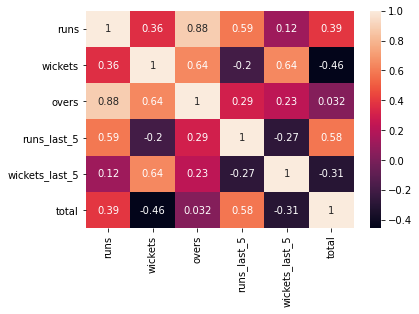

In [60]:
from seaborn import heatmap
heatmap(data=df.corr(), annot=True)

In [13]:
# we are just using this function to correct the venue names.
df['venue'] = df['venue'].apply(venue_name_correction)
df.head()

,date,venue,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,"M Chinnaswamy Stadium, Bangalore",Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,"M Chinnaswamy Stadium, Bangalore",Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,"M Chinnaswamy Stadium, Bangalore",Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,"M Chinnaswamy Stadium, Bangalore",Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,"M Chinnaswamy Stadium, Bangalore",Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [14]:
df_new = pd.get_dummies(data=df,columns=['venue','batting_team','bowling_team'])
df_new.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,"venue_ACA-VDCA Stadium, Visakhapatnam","venue_Barabati Stadium, Cuttack","venue_Dr DY Patil Sports Academy, Mumbai",...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
df_new.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'venue_ACA-VDCA Stadium, Visakhapatnam',
       'venue_Barabati Stadium, Cuttack',
       'venue_Dr DY Patil Sports Academy, Mumbai',
       'venue_Dubai International Cricket Stadium, Dubai',
       'venue_Eden Gardens, Kolkata', 'venue_Feroz Shah Kotla, Delhi',
       'venue_Himachal Pradesh Cricket Association Stadium, Dharamshala',
       'venue_Holkar Cricket Stadium, Indore',
       'venue_JSCA International Stadium Complex, Ranchi',
       'venue_M Chinnaswamy Stadium, Bangalore',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium, Pune',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Raipur International Cricket Stadium, Raipur',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera',
       'venue_Sawai Mansingh Stadium, Jaipur',
       'venue_Sharjah Cricket Stadi

In [16]:
df_new = df_new[['date','venue_ACA-VDCA Stadium, Visakhapatnam',
       'venue_Barabati Stadium, Cuttack',
       'venue_Dr DY Patil Sports Academy, Mumbai',
       'venue_Dubai International Cricket Stadium, Dubai',
       'venue_Eden Gardens, Kolkata', 'venue_Feroz Shah Kotla, Delhi',
       'venue_Himachal Pradesh Cricket Association Stadium, Dharamshala',
       'venue_Holkar Cricket Stadium, Indore',
       'venue_JSCA International Stadium Complex, Ranchi',
       'venue_M Chinnaswamy Stadium, Bangalore',
       'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium, Pune',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Raipur International Cricket Stadium, Raipur',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera',
       'venue_Sawai Mansingh Stadium, Jaipur',
       'venue_Sharjah Cricket Stadium, Sharjah',
       'venue_Sheikh Zayed Stadium, Abu-Dhabi',
       'venue_Wankhede Stadium, Mumbai', 'batting_team_Chennai Super Kings',
       'batting_team_Delhi Daredevils', 'batting_team_Kings XI Punjab',
       'batting_team_Kolkata Knight Riders', 'batting_team_Mumbai Indians',
       'batting_team_Rajasthan Royals',
       'batting_team_Royal Challengers Bangalore',
       'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings',
       'bowling_team_Delhi Daredevils', 'bowling_team_Kings XI Punjab',
       'bowling_team_Kolkata Knight Riders', 'bowling_team_Mumbai Indians',
       'bowling_team_Rajasthan Royals',
       'bowling_team_Royal Challengers Bangalore',
       'bowling_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [17]:
df_new.head()

,date,"venue_ACA-VDCA Stadium, Visakhapatnam","venue_Barabati Stadium, Cuttack","venue_Dr DY Patil Sports Academy, Mumbai","venue_Dubai International Cricket Stadium, Dubai","venue_Eden Gardens, Kolkata","venue_Feroz Shah Kotla, Delhi","venue_Himachal Pradesh Cricket Association Stadium, Dharamshala","venue_Holkar Cricket Stadium, Indore","venue_JSCA International Stadium Complex, Ranchi",...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [18]:
# Resetting Index
df_new.reset_index(inplace=True)
df_new.drop('index',inplace=True,axis=1)
df_new

,date,"venue_ACA-VDCA Stadium, Visakhapatnam","venue_Barabati Stadium, Cuttack","venue_Dr DY Patil Sports Academy, Mumbai","venue_Dubai International Cricket Stadium, Dubai","venue_Eden Gardens, Kolkata","venue_Feroz Shah Kotla, Delhi","venue_Himachal Pradesh Cricket Association Stadium, Dharamshala","venue_Holkar Cricket Stadium, Indore","venue_JSCA International Stadium Complex, Ranchi",...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
1,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
2,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
3,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
4,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35646,2017-05-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,106,9,18.1,29,4,107
35647,2017-05-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,107,9,18.2,29,4,107
35648,2017-05-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,107,9,18.3,28,4,107
35649,2017-05-19,0,0,0,0,0,0,0,0,0,...,1,0,0,0,107,9,18.4,24,4,107


## Data Pre-processing 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cols = scaler.fit_transform(df_new[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']])
pickle.dump(scaler, open('scaler.pkl','wb'))

scaled_cols = pd.DataFrame(scaled_cols,columns=['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5'])
df_new.drop(['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5'],axis=1,inplace=True)
df_new = pd.concat([df_new,scaled_cols],axis=1)
df_new.head()

,date,"venue_ACA-VDCA Stadium, Visakhapatnam","venue_Barabati Stadium, Cuttack","venue_Dr DY Patil Sports Academy, Mumbai","venue_Dubai International Cricket Stadium, Dubai","venue_Eden Gardens, Kolkata","venue_Feroz Shah Kotla, Delhi","venue_Himachal Pradesh Cricket Association Stadium, Dharamshala","venue_Holkar Cricket Stadium, Indore","venue_JSCA International Stadium Complex, Ranchi",...,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,total,runs,wickets,overs,runs_last_5,wickets_last_5
0,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,222,-0.832372,-1.590613,-1.667664,1.713851,-1.233715
1,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,222,-0.832372,-1.062418,-1.644520,1.713851,-0.294064
2,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,222,-0.832372,-1.062418,-1.621376,1.713851,-0.294064
3,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,222,-0.832372,-1.062418,-1.598232,1.713851,-0.294064
4,2008-04-18,0,0,0,0,0,0,0,0,0,...,0,0,1,0,222,-0.832372,-1.062418,-1.575088,1.627459,-0.294064


In [20]:
# We are using data from 2008-2016 for training and from 2017-2019 for testing
X_train = df_new.drop('total',axis=1)[df_new['date'].dt.year<=2016]
X_test = df_new.drop('total',axis=1)[df_new['date'].dt.year>=2017]

X_train.drop('date',inplace=True,axis=1)
X_test.drop('date',inplace=True,axis=1)

y_train = df_new[df_new['date'].dt.year<=2016]['total'].values
y_test = df_new[df_new['date'].dt.year>=2017]['total'].values

In [21]:
X_train

,"venue_ACA-VDCA Stadium, Visakhapatnam","venue_Barabati Stadium, Cuttack","venue_Dr DY Patil Sports Academy, Mumbai","venue_Dubai International Cricket Stadium, Dubai","venue_Eden Gardens, Kolkata","venue_Feroz Shah Kotla, Delhi","venue_Himachal Pradesh Cricket Association Stadium, Dharamshala","venue_Holkar Cricket Stadium, Indore","venue_JSCA International Stadium Complex, Ranchi","venue_M Chinnaswamy Stadium, Bangalore",...,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.832372,-1.590613,-1.667664,1.713851,-1.233715
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.832372,-1.062418,-1.644520,1.713851,-0.294064
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.832372,-1.062418,-1.621376,1.713851,-0.294064
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.832372,-1.062418,-1.598232,1.713851,-0.294064
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.832372,-1.062418,-1.575088,1.627459,-0.294064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32868,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,2.388520,2.106747,1.595629,1.281891,2.524889
32869,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,2.533823,2.106747,1.618773,1.454675,2.524889
32870,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,2.558041,2.106747,1.641917,1.454675,2.524889
32871,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,2.582258,2.106747,1.665060,1.541067,2.524889


# Model Algorithms

## Ridge Regression 

In [22]:
models = dict()

In [23]:
from sklearn.linear_model import Ridge
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [24]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = RandomizedSearchCV(ridge,parameters,cv=10,scoring='neg_mean_squared_error')
ridge_regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   scoring='neg_mean_squared_error')

In [25]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 35}
-347.1476351498834


In [26]:
ridge.fit(X_train, y_train)

Ridge()

In [27]:
train_score_regressor = str(ridge.score(X_train, y_train)*100)
test_score_regressor = str(ridge.score(X_test, y_test)*100)
print(f'Train Score : {train_score_regressor[:5]}%\nTest Score : {test_score_regressor[:5]}%')
models["ridge"] = test_score_regressor

Train Score : 66.09%
Test Score : 73.69%


In [28]:
print("---- Ridge Regression - Model Evaluation ----")
prediction_r = ridge_regressor.predict(X_test)
print('MAE:', mean_absolute_error(y_test, prediction_r))
print('MSE:', mean_squared_error(y_test, prediction_r))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction_r)))

---- Ridge Regression - Model Evaluation ----
MAE: 12.363044348487998
MSE: 266.5429533470788
RMSE: 16.32614324778142


<AxesSubplot:ylabel='Count'>

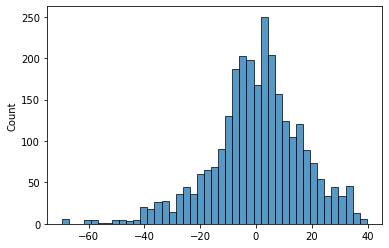

In [66]:
sns.histplot(y_test-prediction_r)

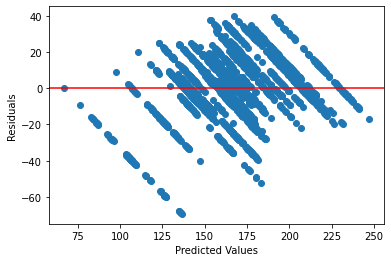

In [59]:
import matplotlib.pyplot as plt

plt.scatter(prediction_r, y_test-prediction_r)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [30]:
# save the model to disk

file = 'finalized_model.sav'
pickle.dump(ridge, open(file, 'wb'))

In [31]:
loaded_model = pickle.load(open(file, 'rb'))
result = str(loaded_model.score(X_test, y_test))
print(result)

0.7369325804504239


### Random Forest Regression Model

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
# Train the Random Forest Regression model
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
train_score_regressor = str(forest.score(X_train, y_train)*100)
test_score_regressor = str(forest.score(X_test, y_test)*100)
print(f'Train Score : {train_score_regressor[:5]}%\nTest Score : {test_score_regressor[:5]}%')
models["rForest"] = test_score_regressor

Train Score : 99.61%
Test Score : 59.32%


<AxesSubplot:ylabel='Count'>

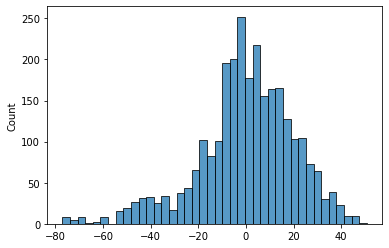

In [46]:
sns.histplot(y_test-forest)

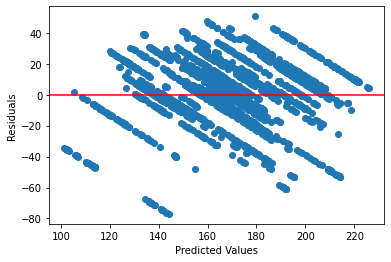

In [47]:
import matplotlib.pyplot as plt

plt.scatter(forest, y_test-forest)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [35]:
print("---- Random Forest Regression - Model Evaluation ----")
forest = forest.predict(X_test)
print('MAE:', mean_absolute_error(y_test, forest))
print('MSE:', mean_squared_error(y_test, forest))
print('RMSE:', np.sqrt(mean_squared_error(y_test, forest)))

---- Random Forest Regression - Model Evaluation ----
MAE: 15.376865250779936
MSE: 412.13319298556115
RMSE: 20.30106383876375


## Support Vector Regressor

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [37]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [38]:
train_score_regressor = str(svr.score(X_train, y_train)*100)
test_score_regressor = str(svr.score(X_test, y_test)*100)
print(f'Train Score : {train_score_regressor[:5]}%\nTest Score : {test_score_regressor[:5]}%')
models["SVR"] = test_score_regressor

Train Score : 76.65%
Test Score : 71.01%


<AxesSubplot:ylabel='Count'>

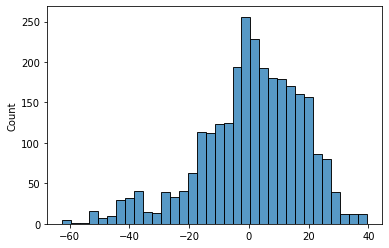

In [57]:
sns.histplot(y_test-svr)

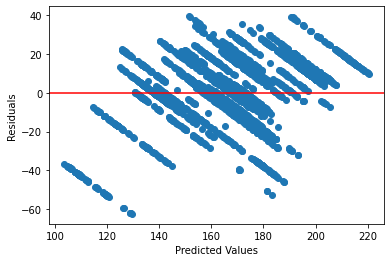

In [58]:
import matplotlib.pyplot as plt

plt.scatter(svr, y_test-svr)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [39]:
print("---- Support Vector Regression - Model Evaluation ----")
svr = svr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, svr))
print('MSE:', mean_squared_error(y_test, svr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svr)))

---- Support Vector Regression - Model Evaluation ----
MAE: 13.25543633794231
MSE: 293.696090173793
RMSE: 17.13756371757062


### Gradient Boosting Regression Model

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [41]:
# Train the Gradient Boosting Regression model
gBoost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gBoost.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [43]:
train_score_regressor = str(gBoost.score(X_train, y_train)*100)
test_score_regressor = str(gBoost.score(X_test, y_test)*100)
print(f'Train Score : {train_score_regressor[:5]}%\nTest Score : {test_score_regressor[:5]}%')
models["gBoost"] = test_score_regressor

Train Score : 70.66%
Test Score : 68.43%


<AxesSubplot:ylabel='Count'>

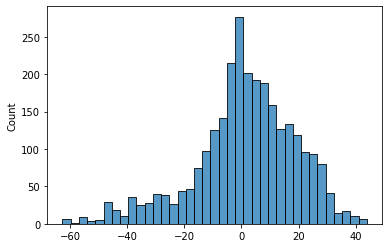

In [50]:
sns.histplot(y_test-gBoost)

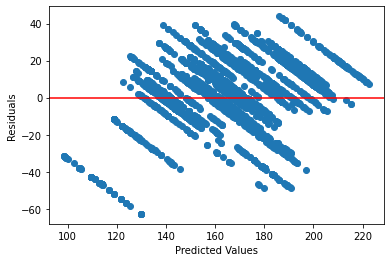

In [54]:
import matplotlib.pyplot as plt

plt.scatter(gBoost, y_test-gBoost)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [44]:
print("---- Gradient Boost Regression - Model Evaluation ----")
gBoost = gBoost.predict(X_test)
print('MAE:', mean_absolute_error(y_test, gBoost))
print('MSE:', mean_squared_error(y_test, gBoost))
print('RMSE:', np.sqrt(mean_squared_error(y_test, gBoost)))

---- Gradient Boost Regression - Model Evaluation ----
MAE: 13.623273462801508
MSE: 319.8032151453639
RMSE: 17.88304267023271


In [45]:
models

{'ridge': '73.69325804504238',
 'rForest': '59.32379640177861',
 'SVR': '71.0131526330874',
 'gBoost': '68.4364644439732'}

In [48]:
import matplotlib.pyplot as plt
# Data to plot
model_names = list(models.keys())
accuracy_scores = [float(score) for score in models.values()]

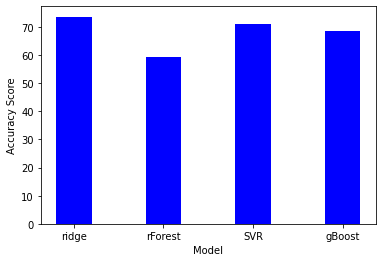

In [56]:
# Create a bar chart
plt.bar(model_names, accuracy_scores, color ='blue', width = 0.4)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.show()